In [204]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt  


In [205]:
#read in data from CSV files 
csv = pd.read_csv('absentee_demo_stats_20201103.csv')  
results = pd.read_csv('results_pct_20201103.csv')
csv.head()

,county_id,county_name,election_dt,party_desc,race_desc,ethncity_desc,gender_desc,age_range,request_year,request_week_num,group_count
0,1,ALAMANCE,11/3/2020,CONSTITUTION,ASIAN,UNDESIGNATED,FEMALE,Age 26 - 40,2020,40,1
1,1,ALAMANCE,11/3/2020,CONSTITUTION,BLACK or AFRICAN AMERICAN,NOT HISPANIC or NOT LATINO,FEMALE,Age 26 - 40,2020,39,1
2,1,ALAMANCE,11/3/2020,CONSTITUTION,OTHER,NOT HISPANIC or NOT LATINO,FEMALE,Age 41 - 65,2020,41,1
3,1,ALAMANCE,11/3/2020,CONSTITUTION,OTHER,NOT HISPANIC or NOT LATINO,MALE,Age 26 - 40,2020,37,1
4,1,ALAMANCE,11/3/2020,CONSTITUTION,UNDESIGNATED,UNDESIGNATED,UNDESIGNATED,Age 41 - 65,2020,36,1


In [206]:
#look at party affiliation count numbers 
results
df = results.groupby(['Choice Party']).count()  

In [207]:
#look at party affiliation, put in dataframe
df = csv.groupby(['party_desc']).count() 
y = df['county_id'].sort_values()



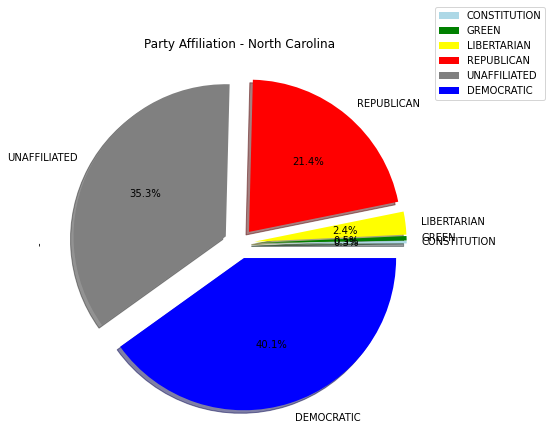

In [208]:
#pie chart, party affiliation 
df = pd.DataFrame({'-': y})
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plot = df.plot.pie(y= '-', figsize=(7, 7),explode = explode, autopct='%1.1f%%',shadow=True,colors = ['lightblue', 'green', 'yellow','red','grey','blue'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0)) 
plt.title("Party Affiliation - North Carolina")
plt.show()

In [209]:
#prepare data for bar plot 
df = df.sort_values("-")
numvot= df.sum(axis=0)  
numdem = df['-'][5]
numrep = df['-'][3] 

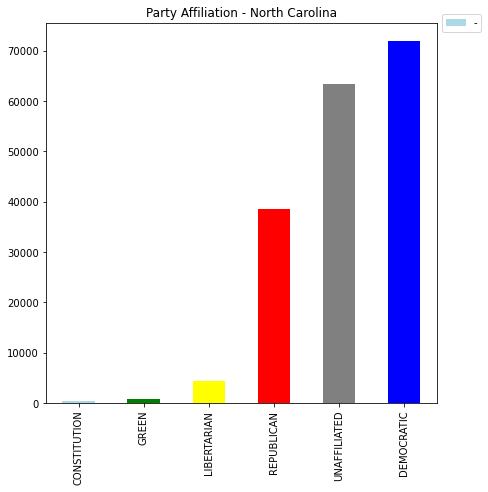

In [212]:
#visualize party affiliation with bar plot 
df = pd.DataFrame({'-': y})
explode = (0, 0.1, 0, 0, 0, 0)
plot = df.plot.bar(y= '-', figsize=(7, 7), color=['lightblue', 'green', 'yellow', 'red', 'grey','blue'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0)) 
plt.title("Party Affiliation - North Carolina") 
plt.xlabel("") 

plt.show()

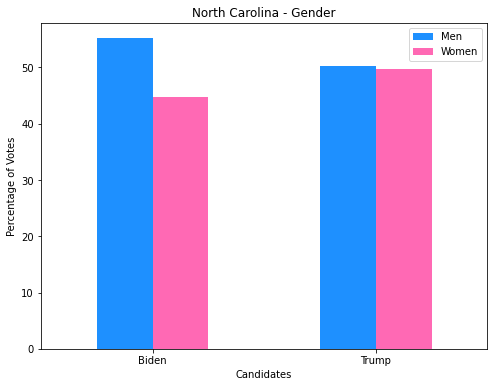

In [214]:
#Gender Analysis, extract genger data from original dataframe 
index = ['Biden', 'Trump'] 
color = ["dodgerblue", "hotpink"]
gender_df = pd.DataFrame({'Men': [gender['county_id'][3],gender['county_id'][12]], 'Women': [gender['county_id'][4], gender['county_id'][13]]}, index=index)

gender_df = gender_df.T
Bid = gender_df['Biden'].sum()
Trum = gender_df['Trump'].sum() 
gender_df['Biden'] = gender_df['Biden']/Bid 
gender_df['Trump'] = gender_df['Trump']/Trum
gender_df = 100* gender_df.T 
gender_df

ax = gender_df.plot.bar(color=color, rot=0, figsize=(8,6)) 
plt.title("North Carolina - Gender") 
plt.ylabel("Percentage of Votes")  
plt.xlabel("Candidates") 
plt.show()



In [215]:
gender['county_id']

party_desc    gender_desc 
CONSTITUTION  FEMALE            140
              MALE              239
              UNDESIGNATED      104
DEMOCRATIC    FEMALE          34985
              MALE            28399
              UNDESIGNATED     8611
GREEN         FEMALE            358
              MALE              290
              UNDESIGNATED      195
LIBERTARIAN   FEMALE           1777
              MALE             1882
              UNDESIGNATED      715
REPUBLICAN    FEMALE          16910
              MALE            16729
              UNDESIGNATED     4825
UNAFFILIATED  FEMALE          29060
              MALE            26573
              UNDESIGNATED     7757
Name: county_id, dtype: int64

In [119]:
race['county_id'] 
eth = csv.groupby(['party_desc','ethncity_desc']).count()   
eth['county_id']

party_desc    ethncity_desc             
CONSTITUTION  HISPANIC or LATINO               24
              NOT HISPANIC or NOT LATINO      248
              UNDESIGNATED                    211
DEMOCRATIC    HISPANIC or LATINO             8422
              NOT HISPANIC or NOT LATINO    32753
              UNDESIGNATED                  30820
GREEN         HISPANIC or LATINO               46
              NOT HISPANIC or NOT LATINO      439
              UNDESIGNATED                    358
LIBERTARIAN   HISPANIC or LATINO              284
              NOT HISPANIC or NOT LATINO     2337
              UNDESIGNATED                   1753
REPUBLICAN    HISPANIC or LATINO             2885
              NOT HISPANIC or NOT LATINO    18483
              UNDESIGNATED                  17096
UNAFFILIATED  HISPANIC or LATINO             7294
              NOT HISPANIC or NOT LATINO    28763
              UNDESIGNATED                  27333
Name: county_id, dtype: int64

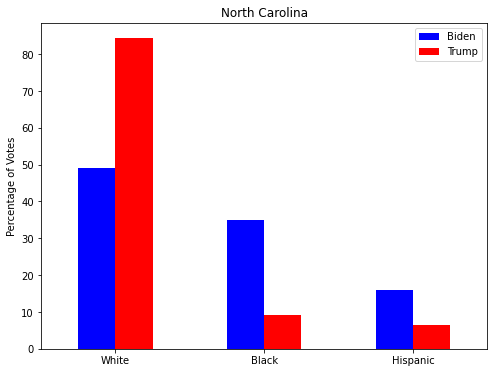

In [216]:
#extract race data  and put in dataframe 
index = ['White', 'Black', 'Hispanic'] 
color = ["blue", "red"]

race_df = pd.DataFrame({'Biden': [race['county_id'][14],race['county_id'][8],eth['county_id'][3]], 'Trump': [race['county_id'][36],race['county_id'][30],eth['county_id'][11]]}, index=index)

Bid = race_df['Biden'].sum()
Trum = race_df['Trump'].sum() 
race_df['Biden'] = race_df['Biden']/Bid 
race_df['Trump'] = race_df['Trump']/Trum
race_df = 100* race_df


ax = race_df.plot.bar(color=color, rot=0, figsize=(8,6)) 
plt.title("North Carolina") 
plt.ylabel("Percentage of Votes")  
plt.show()

In [194]:
age = csv.groupby(['party_desc','age_range']).count()   
age['county_id']

party_desc    age_range  
CONSTITUTION  Age 18 - 25       59
              Age 26 - 40      163
              Age 41 - 65      207
              Age Over 65       54
DEMOCRATIC    Age 18 - 25    12276
              Age 26 - 40    16776
              Age 41 - 65    22517
              Age Over 65    20426
GREEN         Age 18 - 25      199
              Age 26 - 40      335
              Age 41 - 65      244
              Age Over 65       65
LIBERTARIAN   Age 18 - 25      958
              Age 26 - 40     1678
              Age 41 - 65     1293
              Age Over 65      445
REPUBLICAN    Age 18 - 25     5718
              Age 26 - 40     8066
              Age 41 - 65    13059
              Age Over 65    11621
UNAFFILIATED  Age 18 - 25    12905
              Age 26 - 40    15907
              Age 41 - 65    19561
              Age Over 65    15017
Name: county_id, dtype: int64

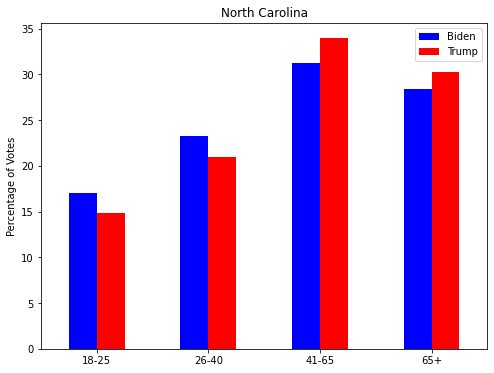

In [217]:
#extract age data  and put in dataframe 
index = ['18-25', '26-40', '41-65', '65+'] 
color = ["blue", "red", "orange", "pink"]

age_df = pd.DataFrame({'Biden': [age['county_id'][4],age['county_id'][5],age['county_id'][6],age['county_id'][7]], 'Trump': [age['county_id'][16],age['county_id'][17],age['county_id'][18],age['county_id'][19]]}, index=index)



Bid = age_df['Biden'].sum()
Trum = age_df['Trump'].sum() 
age_df['Biden'] = age_df['Biden']/Bid 
age_df['Trump'] = age_df['Trump']/Trum
age_df = 100* age_df


ax = age_df.plot.bar(color=color, rot=0, figsize=(8,6)) 
plt.title("North Carolina") 
plt.ylabel("Percentage of Votes") 
plt.ylabel("Percentage of Votes") 
plt.show()